In [40]:
x = metadata_cache['valid_sections_all']['DK18']
x.reverse()

In [41]:
x

[446,
 444,
 443,
 441,
 440,
 438,
 437,
 436,
 435,
 434,
 433,
 432,
 431,
 429,
 428,
 427,
 426,
 425,
 417,
 416,
 415,
 414,
 413,
 412,
 411,
 410,
 409,
 408,
 407,
 406,
 405,
 404,
 403,
 402,
 401,
 399,
 398,
 397,
 396,
 395,
 394,
 393,
 392,
 391,
 390,
 389,
 388,
 387,
 386,
 385,
 384,
 383,
 382,
 381,
 380,
 379,
 378,
 377,
 375,
 374,
 373,
 372,
 371,
 369,
 368,
 367,
 366,
 365,
 362,
 361,
 360,
 359,
 357,
 356,
 355,
 354,
 353,
 352,
 351,
 350,
 349,
 348,
 347,
 346,
 345,
 344,
 343,
 342,
 340,
 338,
 337,
 336,
 335,
 334,
 333,
 332,
 331,
 330,
 329,
 328,
 327,
 326,
 325,
 324,
 323,
 322,
 321,
 320,
 319,
 318,
 317,
 315,
 314,
 313,
 312,
 311,
 310,
 309,
 308,
 307,
 306,
 305,
 304,
 303,
 302,
 301,
 289,
 288,
 287,
 286,
 285,
 284,
 283,
 282,
 281,
 279,
 278,
 277,
 276,
 275,
 274,
 273,
 272,
 271,
 270,
 269,
 268,
 267,
 266,
 265,
 264,
 263,
 262,
 261,
 260,
 259,
 258,
 256,
 255,
 254,
 253,
 252,
 251,
 250,
 249,
 248,
 247

In [42]:
metadata_cache['sections_to_filenames']['DK18'][446]

'DK17_18_slide223_2019_03_26-S3'

In [43]:
metadata_cache['sections_to_filenames']['DK18'][444]

'DK17_18_slide222_2019_03_26-S4'

In [34]:
%matplotlib inline

import bloscpack as bp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math
import pandas as pd
import os
import sys 

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from metadata import *
from utilities2015 import *
from registration_utilities import *
from annotation_utilities import *
from data_manager import DataManager

def change_plot_sizes( width=8, length=6):
    # Get current size
    fig_size = plt.rcParams["figure.figsize"]

    # Prints: [8.0, 6.0]
    print "Current size:", fig_size

    # Set figure width to 12 and height to 9
    fig_size[0] = width
    fig_size[1] = length
    plt.rcParams["figure.figsize"] = fig_size

In [33]:
os.environ['ROOT_DIR']

'/media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/'

# Filepaths

In [5]:
# Encodes metainformation used by the rigid erosian algorithm for alignment
param_fp = os.path.join(os.environ['REPO_DIR'], 'preprocess', 'parameters', "Parameters_Rigid_MutualInfo.txt")
print( param_fp )

/home/alexn/brainDev/src/preprocess/parameters/Parameters_Rigid_MutualInfo.txt


In [6]:
stack = 'DK18'

# broken
curr_img_name = 'DK17_18_slide103_2019_03_11-S2' # moving
prev_img_name = 'DK17_18_slide100_2019_03_11-S4' # fixed

output_subdir = os.path.join(ROOT_DIR, 'CSHL_data_processed', stack, stack+'_elastix_output', \
                             curr_img_name + '_to_' + prev_img_name)
# Contains transformation parameters (3 numbers)
# Contains size of image + center of rotation (always the centerpoint)
transformation_params_fp = os.path.join( output_subdir, 'TransformParameters.0.txt')

def get_transformation_params_fp( curr_img_name, prev_img_name):
    output_subdir = os.path.join(ROOT_DIR, 'CSHL_data_processed', stack, stack+'_elastix_output', \
                             curr_img_name + '_to_' + prev_img_name)
    # Contains transformation parameters (3 numbers)
    # Contains size of image + center of rotation (always the centerpoint)
    transformation_params_fp = os.path.join( output_subdir, 'TransformParameters.0.txt')

    with open(transformation_params_fp, 'r') as f:
        return f.read()

# Pairwise Transformations

In [40]:
def plot_two_images( img1, img2, scatterpoints):
    x_pts = []
    y_pts = []
    for point in scatterpoints:
        x_pts.append( point[0] )
        y_pts.append( point[1] )
    
    plt.imshow( img1*5, cmap='gray')
    plt.scatter( x_pts, y_pts, c='r', s=8)
    plt.show()
    plt.imshow( img2*5, cmap='gray')
    plt.scatter( x_pts, y_pts, c='r', s=8)
    plt.show()
    
def plot_two_images_overlay( img1, img2, scatterpoints):
    x_pts = []
    y_pts = []
    for point in scatterpoints:
        x_pts.append( point[0] )
        y_pts.append( point[1] )
        
    img1_shape = np.shape(img1)
    img2_shape = np.shape(img2)
    img3 = np.zeros( ( max(img1_shape[0], img2_shape[0]), max(img1_shape[1], img2_shape[1]), 3) )
    img3[0:img1_shape[0], 0:img1_shape[1], 0] += img1
    img3[0:img2_shape[0], 0:img2_shape[1], 2] += img2
    
    plt.imshow( img3*5)
    plt.scatter( x_pts, y_pts, c='r', s=8)
    plt.show()

Trying to load /media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_thumbnail_NtbNormalized/DK17_18_slide112_2019_03_11-S2_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_thumbnail_NtbNormalized/DK17_18_slide111_2019_03_11-S4_thumbnail_NtbNormalized.tif


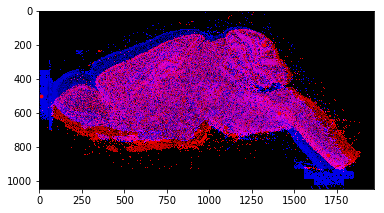

In [68]:
stack = 'DK18'

curr_img_name = 'DK17_18_slide112_2019_03_11-S2' # moving
prev_img_name = 'DK17_18_slide111_2019_03_11-S4' # fixed
    
curr_img_notrans = DataManager.load_image_v2(stack=stack, 
                                section=metadata_cache['filenames_to_sections'][stack][curr_img_name],
                                 prep_id='None',
                                 resol='thumbnail', version='NtbNormalized')
prev_img_notrans = DataManager.load_image_v2(stack=stack, 
                                section=metadata_cache['filenames_to_sections'][stack][prev_img_name],
                                 prep_id='None',
                                 resol='thumbnail', version='NtbNormalized')

scatterpoints = [[1320, 200] , [1410, 600], [10, 500], [1700, 850]]
#plot_two_images( curr_img_notrans, prev_img_notrans, scatterpoints )
plot_two_images_overlay(curr_img_notrans, prev_img_notrans, scatterpoints)

Load elastix-computed transform: /media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_elastix_output/DK17_18_slide112_2019_03_11-S2_to_DK17_18_slide111_2019_03_11-S4/TransformParameters.0.txt


Images PAIRWISE TRANSFORMED


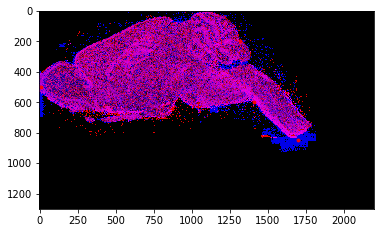

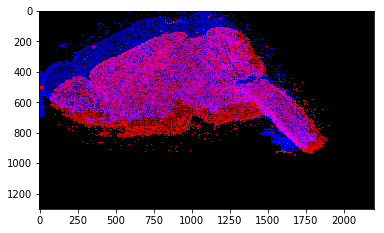

In [50]:
t_matrix = DataManager.load_consecutive_section_transform(
    moving_fn=curr_img_name, 
    fixed_fn=prev_img_name, 
    elastix_output_dir='/media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_elastix_output', 
    custom_output_dir='/media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_custom_output')

#final_transforms_to_anchor_fp = DataManager.get_transforms_filename( stack )
prev_img_transformed_pairwise = sp.ndimage.affine_transform( prev_img_notrans, t_matrix,
                                                 output_shape=(1300,2200) )

#print(t_matrix)

# 
scatterpoints = [[1320, 200] , [1410, 600], [10, 500], [1700, 850]]
print( "Images PAIRWISE TRANSFORMED" )
#plot_two_images( curr_img_notrans[100:,100:], prev_img_transformed_pairwise, scatterpoints )

plot_two_images_overlay( curr_img_notrans[100:,100:], prev_img_transformed_pairwise, scatterpoints )
plot_two_images_overlay( curr_img_notrans, prev_img_transformed_pairwise, scatterpoints )

In [10]:
DATA_DIR

'/media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed'

In [9]:
DataManager.load_consecutive_section_transform(
    moving_fn=curr_img_name, 
    fixed_fn=prev_img_name, 
    elastix_output_dir='/media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_elastix_output', 
    custom_output_dir='/media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_custom_output')

Load elastix-computed transform: /media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_elastix_output/DK17_18_slide103_2019_03_11-S2_to_DK17_18_slide100_2019_03_11-S4/TransformParameters.0.txt


array([[ 9.85167999e-01, -1.71592581e-01, -9.62657690e+01],
       [ 1.71592581e-01,  9.85167999e-01, -2.09181797e+02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [27]:
stack_metadata

{'CHATM2': {'cutting_plane': 'sagittal', 'resolution': 0.325, 'stain': 'NTB'},
 'DK17': {'cutting_plane': 'sagittal', 'resolution': 0.325, 'stain': 'NTB'},
 'DK18': {'cutting_plane': 'sagittal', 'resolution': 0.325, 'stain': 'NTB'},
 'DK19': {'cutting_plane': 'sagittal', 'resolution': 0.325, 'stain': 'NTB'},
 'MD635': {'cutting_plane': 'sagittal', 'resolution': 0.46, 'stain': 'NTB'}}

Load elastix-computed transform: /media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_elastix_output/DK17_18_slide112_2019_03_11-S2_to_DK17_18_slide111_2019_03_11-S4/TransformParameters.0.txt


Images INVERSE PAIRWISE TRANSFORMED


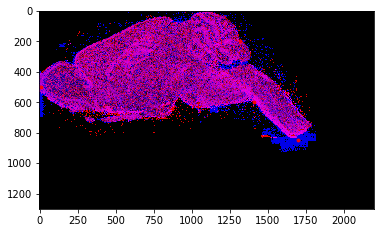

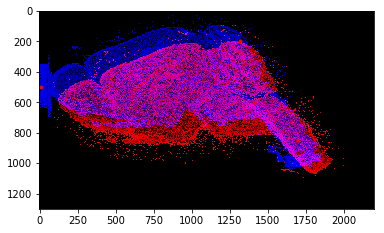

In [77]:
t_matrix = DataManager.load_consecutive_section_transform(
    moving_fn=curr_img_name, 
    fixed_fn=prev_img_name, 
    elastix_output_dir='/media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_elastix_output', 
    custom_output_dir='/media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_custom_output')

#final_transforms_to_anchor_fp = DataManager.get_transforms_filename( stack )
curr_img_transformed_pairwise = sp.ndimage.affine_transform( curr_img_notrans, np.linalg.inv(t_matrix),
                                                 output_shape=(1300,2200) )

scatterpoints = [[1320, 200] , [1410, 600], [10, 500], [1700, 850]]
print( "Images INVERSE PAIRWISE TRANSFORMED" )
plot_two_images_overlay( curr_img_notrans[100:,100:], prev_img_transformed_pairwise, scatterpoints )
plot_two_images_overlay( curr_img_transformed_pairwise, prev_img_notrans, scatterpoints )

In [29]:
DATA_ROOT

NameError: name 'DATA_ROOT' is not defined

# Anchor Transformations

Trying to load /media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_thumbnail_NtbNormalized/DK17_18_slide107_2019_03_11-S2_thumbnail_NtbNormalized.tif
Trying to load /media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_thumbnail_NtbNormalized/DK17_18_slide106_2019_03_11-S4_thumbnail_NtbNormalized.tif


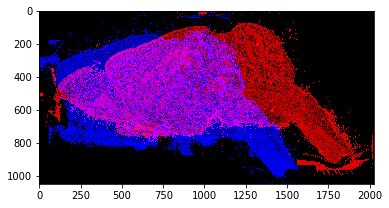

In [61]:
stack = 'DK18'

curr_img_name = 'DK17_18_slide107_2019_03_11-S2' # moving
prev_img_name = 'DK17_18_slide106_2019_03_11-S4' # fixed
#(TransformParameters -0.044449 310.074256 -59.353878)
    
curr_img_notrans = DataManager.load_image_v2(stack=stack, 
                                section=metadata_cache['filenames_to_sections'][stack][curr_img_name],
                                 prep_id='None',
                                 resol='thumbnail', version='NtbNormalized')
prev_img_notrans = DataManager.load_image_v2(stack=stack, 
                                section=metadata_cache['filenames_to_sections'][stack][prev_img_name],
                                 prep_id='None',
                                 resol='thumbnail', version='NtbNormalized')

scatterpoints = [[1320, 200] , [1410, 600], [10, 500], [1700, 850]]
#plot_two_images( curr_img_notrans, prev_img_notrans, scatterpoints )
plot_two_images_overlay(curr_img_notrans, prev_img_notrans, scatterpoints)

Images PAIRWISE TRANSFORMED


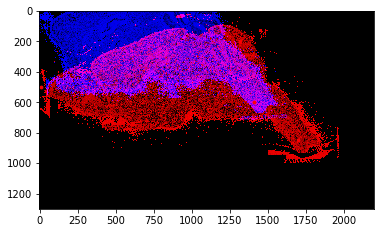

In [67]:
# Loads the transforms from the csv file
transforms_dict = DataManager.load_transforms(stack, downsample_factor=32, use_inverse=True)

curr_img_transformed = sp.ndimage.affine_transform( curr_img_notrans, transforms_dict[curr_img_name],
                                                 output_shape=(1300,2200) )
prev_img_transformed = sp.ndimage.affine_transform( prev_img_notrans, transforms_dict[prev_img_name],
                                                 output_shape=(1300,2200))


scatterpoints = [[1320, 200] , [1410, 600], [10, 500], [1700, 850]]
print( "Images PAIRWISE TRANSFORMED" )
#plot_two_images( curr_img_notrans[100:,100:], prev_img_transformed_pairwise, scatterpoints )

plot_two_images_overlay( curr_img_transformed, prev_img_transformed, scatterpoints )


Images PAIRWISE TRANSFORMED


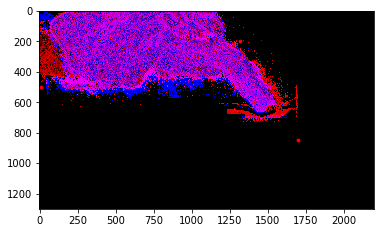

In [65]:
# Loads the transforms from the csv file
transforms_dict = DataManager.load_transforms(stack, downsample_factor=32, use_inverse=True)

curr_img_transformed = sp.ndimage.affine_transform( curr_img_notrans, transforms_dict[curr_img_name],
                                                 output_shape=(1300,2200) )
prev_img_transformed = sp.ndimage.affine_transform( prev_img_notrans, transforms_dict[prev_img_name],
                                                 output_shape=(1300,2200))


scatterpoints = [[1320, 200] , [1410, 600], [10, 500], [1700, 850]]
print( "Images PAIRWISE TRANSFORMED" )
#plot_two_images( curr_img_notrans[100:,100:], prev_img_transformed_pairwise, scatterpoints )

plot_two_images_overlay( curr_img_transformed[270:,270:], prev_img_transformed, scatterpoints )

# plt.imshow(curr_img_transformed[100:,100:]*5, cmap='gray')
# plt.scatter([1320, 1410, 10, 1700],[200, 600, 500, 850], c='r', s=8)
# plt.show()
# plt.imshow(prev_img_transformed*5, cmap='gray')
# plt.scatter([1320, 1410, 10, 1700],[200, 600, 500, 850], c='r', s=8)
# plt.show()

# Big Success

In [92]:
# Anchor transform
for section in range(170, 190):
    fn = metadata_cache['sections_to_filenames'][stack][section]
        
    img_fp = DataManager.get_image_filepath_v2(stack=stack, section=section, 
                            prep_id='None', resol='thumbnail', version='NtbNormalized')
    
    T = DataManager.load_transforms(stack, downsample_factor=32, use_inverse=True)[fn]
    
    op_str = ''
    op_str += " +distort AffineProjection '%(sx)f,%(rx)f,%(ry)f,%(sy)f,%(tx)f,%(ty)f' " % {
     'sx':T[0,0],
     'sy':T[1,1],
     'rx':T[1,0],
     'ry':T[0,1],
     'tx':T[0,2],
     'ty':T[1,2],}
    
    output_fp ='/home/alexn/Desktop/transforms/'
    if not os.path.exists( output_fp ):
        os.makedirs(output_fp)

    try:
        execute_command("convert \"%(input_fp)s\"  +repage -virtual-pixel background -background %(bg_color)s %(op_str)s -flatten -compress lzw \"%(output_fp)s\"" % \
                    {'op_str': op_str,
                     'input_fp': img_fp,
                     'output_fp': output_fp+fn,
                     'bg_color': 'black'})
    except Exception as e:
        print e

convert "/media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_thumbnail_NtbNormalized/DK17_18_slide085_2019_02_28-S4_thumbnail_NtbNormalized.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.994491,0.104822,-0.104822,0.994491,222.606123,-51.832593'  -flatten -compress lzw "/home/alexn/Desktop/transforms/DK17_18_slide085_2019_02_28-S4"
return code: 0
convert "/media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_thumbnail_NtbNormalized/DK17_18_slide086_2019_02_28-S2_thumbnail_NtbNormalized.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.982604,0.185712,-0.185712,0.982604,200.199631,-145.547516'  -flatten -compress lzw "/home/alexn/Desktop/transforms/DK17_18_slide086_2019_02_28-S2"
return code: 0
convert "/media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_thumbnail_NtbNormalized/DK17_18_slide086_2019_02_28-S4_thumbnail_NtbNormalized.tif

Exception: Section is invalid: Placeholder.

In [93]:
# Anchor transform
for section in [200, 205]:
    fn = metadata_cache['sections_to_filenames'][stack][section]
        
    img_fp = DataManager.get_image_filepath_v2(stack=stack, section=section, 
                            prep_id='None', resol='thumbnail', version='NtbNormalized')
    
    T = DataManager.load_transforms(stack, downsample_factor=32, use_inverse=True)[fn]
    
    op_str = ''
    op_str += " +distort AffineProjection '%(sx)f,%(rx)f,%(ry)f,%(sy)f,%(tx)f,%(ty)f' " % {
     'sx':T[0,0],
     'sy':T[1,1],
     'rx':T[1,0],
     'ry':T[0,1],
     'tx':T[0,2],
     'ty':T[1,2],}
    
    output_fp ='/home/alexn/Desktop/transforms/'
    if not os.path.exists( output_fp ):
        os.makedirs(output_fp)

    try:
        execute_command("convert \"%(input_fp)s\"  +repage -virtual-pixel background -background %(bg_color)s %(op_str)s -flatten -compress lzw \"%(output_fp)s\"" % \
                    {'op_str': op_str,
                     'input_fp': img_fp,
                     'output_fp': output_fp+fn,
                     'bg_color': 'black'})
    except Exception as e:
        print e

convert "/media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_thumbnail_NtbNormalized/DK17_18_slide100_2019_03_11-S4_thumbnail_NtbNormalized.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.991749,0.128192,-0.128192,0.991749,156.817620,-157.509337'  -flatten -compress lzw "/home/alexn/Desktop/transforms/DK17_18_slide100_2019_03_11-S4"
return code: 0
convert "/media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_thumbnail_NtbNormalized/DK17_18_slide103_2019_03_11-S2_thumbnail_NtbNormalized.tif"  +repage -virtual-pixel background -background black  +distort AffineProjection '0.999037,-0.043886,0.043886,0.999037,262.170773,47.246213'  -flatten -compress lzw "/home/alexn/Desktop/transforms/DK17_18_slide103_2019_03_11-S2"
return code: 0


In [105]:
# Anchor transform
for section in [205]:
    fn = metadata_cache['sections_to_filenames'][stack][section]
        
    img_fp = DataManager.get_image_filepath_v2(stack=stack, section=section, 
                            prep_id='None', resol='thumbnail', version='NtbNormalized')
    
    T = np.array([[0.999757, -0.022057, 282.815466], 
                 [0.022057, 0.999757, -0.812712],
                 [0,0,1]])
    
    op_str = ''
    op_str += " +distort AffineProjection '%(sx)f,%(rx)f,%(ry)f,%(sy)f,%(tx)f,%(ty)f' " % {
     'sx':T[0,0],
     'sy':T[1,1],
     'rx':T[1,0],
     'ry':T[0,1],
     'tx':T[0,2],
     'ty':T[1,2],}
    
    output_fp ='/home/alexn/Desktop/transforms/'
    if not os.path.exists( output_fp ):
        os.makedirs(output_fp)

    try:
        execute_command("convert \"%(input_fp)s\"  +repage -virtual-pixel background \
        -background %(bg_color)s %(op_str)s -flatten -compress lzw \"%(output_fp)s\"" % \
                    {'op_str': op_str,
                     'input_fp': img_fp,
                     'output_fp': output_fp+fn,
                     'bg_color': 'black'})
    except Exception as e:
        print e

convert "/media/alexn/Data_2/Atlas_Root_Dirs/Duke_Brains/CSHL_data_processed/DK18/DK18_thumbnail_NtbNormalized/DK17_18_slide103_2019_03_11-S2_thumbnail_NtbNormalized.tif"  +repage -virtual-pixel background         -background black  +distort AffineProjection '0.999757,0.022057,-0.022057,0.999757,282.815466,-0.812712'  -flatten -compress lzw "/home/alexn/Desktop/transforms/DK17_18_slide103_2019_03_11-S2"
return code: 0


In [102]:
DataManager.load_transforms(stack, downsample_factor=32, use_inverse=True)[fn]

array([[ 9.99036550e-01,  4.38859006e-02,  2.62170773e+02],
       [-4.38859006e-02,  9.99036550e-01,  4.72462130e+01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])